## Deskripsi projek

Projek ini mengulas dan mengidentifikasi jenis-jenis usaha tempat makan di LA yang bertujuan untuk membuka sebuah kafe kecil di Los Angeles. Karena kafe yang akan dibuka yaitu kafe dengan menggunakan robot sebagai "pekerja" pramusaji membutuhkan modal yang besar. Oleh karena itu perlu untuk menarik minat investor jenis usaha makanan seperti apa yang dapat menjanjikan dan dapat menarik para investor. Data yang didapat dari sumber terbuka (open source), langkah-langkah yang dilakukan yaitu:

1. Memuat library yang dibutuhkan
2. Memuat datanya
3. Melakukan Pra-pemrosesan
4. Analisis data
5. Kesimpulan

## Memuat libraby

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


## Memuat data

In [2]:
data = pd.read_csv('/datasets/rest_data_us.csv')
data.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


**Terdapat nilai yag hilang pada kolom `chain`, karena nilai yang hilang hanya ada 3 baris maka NaN di hilangkan saja dan hal ini tidak akan begitu mempengaruhi proses analisi data**

## Pra-pemrosesan data

In [4]:
# memriksa nilai yang hilang
data_withnan= data[data['chain'].isna()]
data_withnan

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [5]:
# data tanpa nilai NaN
rest=data[data['chain'].notnull()]
rest

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [6]:
# mengubah tipe data menjadi object
rest['id'] = rest['id'].astype('str')

/tmp/ipykernel_73/2942053373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest['id'] = rest['id'].astype('str')


In [7]:
# menghilangkan data duplikat jika ada
rest.drop_duplicates()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [8]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   object
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 527.6+ KB


## Analisi data

### Proporsi dari berbagai jenis usaha

In [9]:
rest['object_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [10]:
rest_grouped = rest['object_type'].value_counts().reset_index()
rest_grouped

,index,object_type
0,Restaurant,7253
1,Fast Food,1066
2,Cafe,435
3,Pizza,319
4,Bar,292
5,Bakery,283


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Restaurant'),
 Text(1, 0, 'Fast Food'),
 Text(2, 0, 'Cafe'),
 Text(3, 0, 'Pizza'),
 Text(4, 0, 'Bar'),
 Text(5, 0, 'Bakery')]

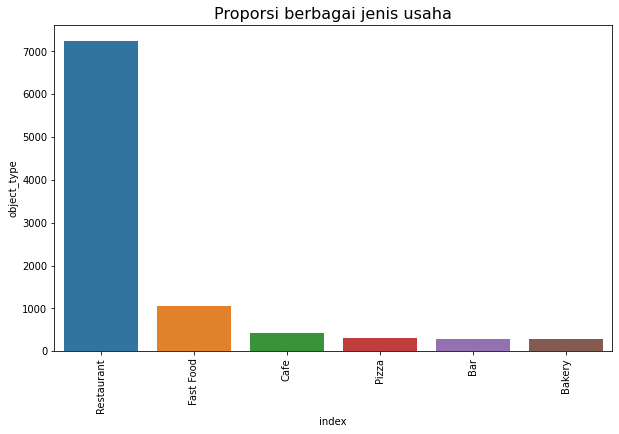

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(rest_grouped['index'], rest_grouped['object_type'], ax=ax)
labels = ax.get_xticklabels()
plt.title('Proporsi berbagai jenis usaha', size=16)
ax.set_xticklabels(labels, rotation=90)

**Jenis usaha restaurant lebih tinggi proporsinya dibandingkan jenis usaha lain**

### Proporsi dari usaha berbasis waralaba dan nonwaralaba

In [12]:
grouped_chain = rest.groupby('chain').count().reset_index()
grouped_chain

,chain,id,object_name,address,object_type,number
0,False,5972,5972,5972,5972,5972
1,True,3676,3676,3676,3676,3676


In [13]:
grouped_chain['chain'] = grouped_chain['chain'].replace([False], 'nonchain')
grouped_chain['chain'] = grouped_chain['chain'].replace([True], 'chain')
grouped_chain

,chain,id,object_name,address,object_type,number
0,nonchain,5972,5972,5972,5972,5972
1,chain,3676,3676,3676,3676,3676


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total business')

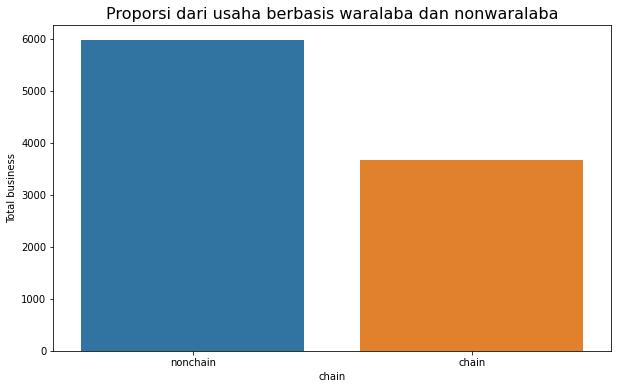

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(grouped_chain['chain'], grouped_chain['id'])
plt.title('Proporsi dari usaha berbasis waralaba dan nonwaralaba', size=16)
plt.ylabel('Total business')

**Proporsi usaha bukan waralaba lebih banyak dibandingkan jenis usaha waralaba**

### Usaha berbasis waralaba

In [15]:
grouped_chain_object = pd.pivot_table(rest, values='object_name', index='object_type', columns=['chain'], aggfunc='count')
grouped_chain_object = grouped_chain_object.fillna(0)
grouped_chain_object

chain,False,True
object_type,,
Bakery,0.0,283.0
Bar,215.0,77.0
Cafe,169.0,266.0
Fast Food,461.0,605.0
Pizza,166.0,153.0
Restaurant,4961.0,2292.0


In [16]:
grouped_chain_object['ratio']= grouped_chain_object[True]/(grouped_chain_object[True]+grouped_chain_object[False])
grouped_chain_object

chain,False,True,ratio
object_type,,,
Bakery,0.0,283.0,1.000000
Bar,215.0,77.0,0.263699
Cafe,169.0,266.0,0.611494
Fast Food,461.0,605.0,0.567542
Pizza,166.0,153.0,0.479624
Restaurant,4961.0,2292.0,0.316007


Text(0, 0.5, 'Rasio')

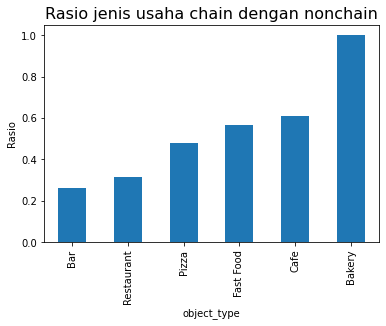

In [17]:
grouped_chain_object['ratio'].sort_values().plot.bar()
plt.title('Rasio jenis usaha chain dengan nonchain', size=16)
plt.ylabel('Rasio')

**Jika dilihat dari hasil data di atas ternyata jenis usaha seperti bakery adalah usaha berbasis waralaba, cafe dan fast food sebagian berbasis waralaba, sementara bar dan restoran kebanyakan berbasis nonwaralaba.**

### Jumlah kursi berdasarkan janis usaha

In [18]:
grouped_number_object = pd.pivot_table(rest, values='number', index='object_type', columns=['chain'], aggfunc='sum')
grouped_number_object = grouped_number_object.fillna(0)
grouped_number_object

chain,False,True
object_type,,
Bakery,0.0,6162.0
Bar,9972.0,3100.0
Cafe,3981.0,6894.0
Fast Food,10895.0,23044.0
Pizza,5200.0,3906.0
Restaurant,245688.0,102810.0


In [19]:
grouped_number_object['ratio']= grouped_number_object[True]/(grouped_number_object[True]+grouped_number_object[False])
grouped_number_object.sort_values(by='ratio')

chain,False,True,ratio
object_type,,,
Bar,9972.0,3100.0,0.237148
Restaurant,245688.0,102810.0,0.295009
Pizza,5200.0,3906.0,0.428948
Cafe,3981.0,6894.0,0.633931
Fast Food,10895.0,23044.0,0.678983
Bakery,0.0,6162.0,1.000000


Text(0, 0.5, 'Rasio')

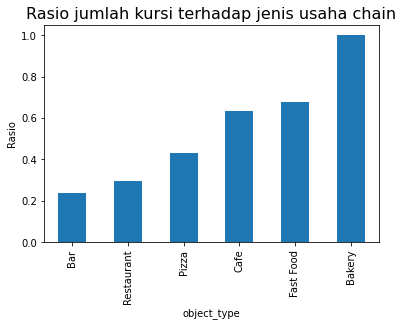

In [20]:
grouped_number_object['ratio'].sort_values().plot.bar()
plt.title('Rasio jumlah kursi terhadap jenis usaha chain', size=16)
plt.ylabel('Rasio')

In [21]:
grouped_number_object_mean = pd.pivot_table(rest, values='number', index='object_type', columns=['chain'], aggfunc='mean')
grouped_number_object_mean = grouped_number_object_mean.fillna(0)
grouped_number_object_mean

chain,False,True
object_type,,
Bakery,0.000000,21.773852
Bar,46.381395,40.259740
Cafe,23.556213,25.917293
Fast Food,23.633406,38.089256
Pizza,31.325301,25.529412
Restaurant,49.523886,44.856021


In [22]:
grouped_number_object_mean['ratio']= grouped_number_object_mean[True]/(grouped_number_object_mean[True]+grouped_number_object_mean[False])
grouped_number_object_mean.sort_values(by='ratio')

chain,False,True,ratio
object_type,,,
Pizza,31.325301,25.529412,0.449029
Bar,46.381395,40.259740,0.464672
Restaurant,49.523886,44.856021,0.475271
Cafe,23.556213,25.917293,0.523862
Fast Food,23.633406,38.089256,0.617103
Bakery,0.000000,21.773852,1.000000


Text(0, 0.5, 'Rasio')

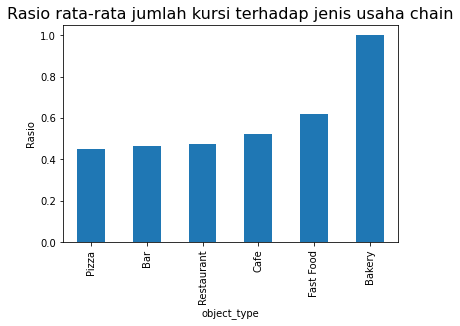

In [23]:
grouped_number_object_mean['ratio'].sort_values().plot.bar()
plt.title('Rasio rata-rata jumlah kursi terhadap jenis usaha chain', size=16)
plt.ylabel('Rasio')

**Karena bakery semuanya berbasis waralaba maka bakery yang rasio jumlah kursinya yang paling tinggi, yang ke dua yaitu fast food. tetapi jika dilihat dari jumlah kursinya, jumlah kursi yang paling banyak ada pada jenis usaha restoran. hal ini karena usaha restoran merupakan usaha makanan yang biasanya makan di tempat bukan take away seperti jenis usaha fast food, bakery ataupun pizza**

###  Jumlah rata-rata kursi untuk setiap jenis usaha

In [24]:
rest.groupby('object_type').agg(kursi_rata_rata=('number', 'mean')).sort_values(by='kursi_rata_rata')

,kursi_rata_rata
object_type,
Bakery,21.773852
Cafe,25.000000
Pizza,28.545455
Fast Food,31.837711
Bar,44.767123
Restaurant,48.048807


Text(0.5, 0, 'jumlah kursi')

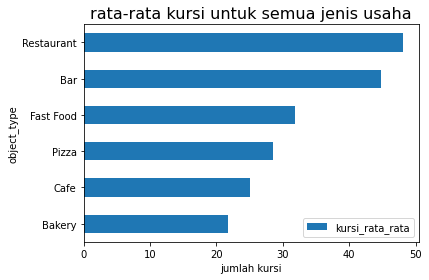

In [25]:
rest.groupby('object_type').agg(kursi_rata_rata=('number', 'mean')).sort_values(by='kursi_rata_rata').plot(kind='barh')
plt.title('rata-rata kursi untuk semua jenis usaha', size=16)
plt.xlabel('jumlah kursi')

**Kursi paling banyak adalah jenis usaha restoran, karena kebanyakan orang datang ke restoran ataupun bar untuk makan di tempat, jika jenih usaha lain seperti bakery, fast food, pizza dan cafe biasanya jarang yang makan ditempat karena biasanya take away oleh karena itu jumlah rata-rata kursinya lebih sedikit dibandingkan jenis usaha restoran dan bar**

### Pindahkan data nama jalan dari kolom address ke kolom terpisah

In [26]:
rest['address_fix'] = rest['address'].apply(lambda x: ' ' .join(x.split(' ')[1:])).to_frame()
rest

/tmp/ipykernel_73/2674069874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest['address_fix'] = rest['address'].apply(lambda x: ' ' .join(x.split(' ')[1:])).to_frame()


,id,object_name,address,chain,object_type,number,address_fix
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY # 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD # 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE 100


### Sepuluh nama jalan teratas berdasarkan jumlah usaha

In [27]:
rest_address_top = rest.groupby('address_fix')['id'].count().reset_index()
rest_address_top_final = rest_address_top.sort_values(by='id', ascending=False).head(10)
rest_address_top_final

,address_fix,id
2691,W SUNSET BLVD,296
2622,W PICO BLVD,288
582,HOLLYWOOD BLVD,167
2837,WILSHIRE BLVD,161
1705,S VERMONT AVE,148
1918,SANTA MONICA BLVD,146
2170,W 3RD ST,145
147,BEVERLY BLVD,135
1295,S FIGUEROA ST,134
755,MELROSE AVE,128


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'W SUNSET BLVD'),
 Text(1, 0, 'W PICO BLVD'),
 Text(2, 0, 'HOLLYWOOD BLVD'),
 Text(3, 0, 'WILSHIRE BLVD'),
 Text(4, 0, 'S VERMONT AVE'),
 Text(5, 0, 'SANTA MONICA BLVD'),
 Text(6, 0, 'W 3RD ST'),
 Text(7, 0, 'BEVERLY BLVD'),
 Text(8, 0, 'S FIGUEROA ST'),
 Text(9, 0, 'MELROSE AVE')]

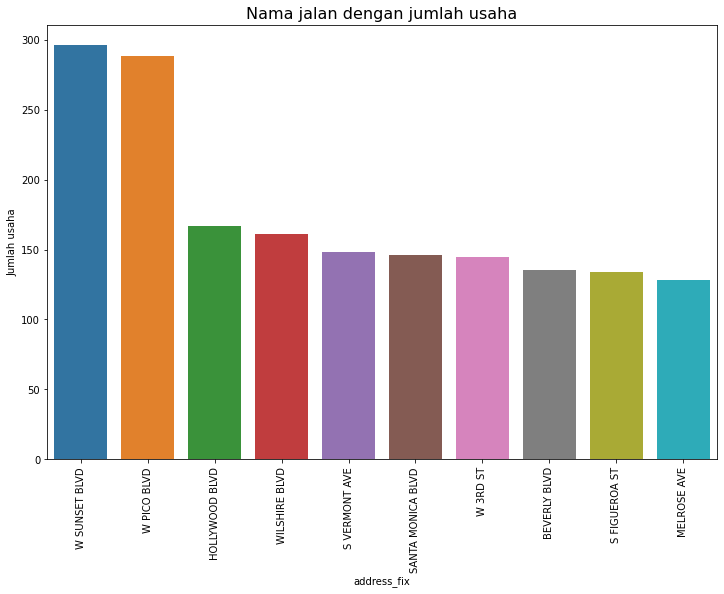

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(rest_address_top_final['address_fix'], rest_address_top_final['id'])
plt.title('Nama jalan dengan jumlah usaha', size=16)
plt.ylabel('Jumlah usaha')
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)

**Jalan W SUNSET BLVD adalah nama jalan dengan jumlah usaha makanan paling banyak dibandingkan di jalan lain di LA**

### Jumlah jalan yang hanya memiliki satu usaha

In [29]:
#  jumlah jalan keseluruhan
rest['address_fix'].nunique()

3097

In [30]:
rest_1_type_only = rest.groupby('address_fix')['object_type'].apply(lambda x: x.nunique()).reset_index()
rest_1_type_only.loc[rest_1_type_only['object_type']==1]

,address_fix,object_type
0,1/2 3RD ST,1
1,1/2 7TH ST,1
2,1/2 BEVERLY BLVD,1
3,1/2 CITY TERRACE DR,1
4,1/2 COLORADO BLVD,1
...,...,...
3090,YORK BLVD # B,1
3091,YOSEMITE DR,1
3093,Z00 DR,1
3095,ZOO DR,1


<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Distribusi jumlah kursi di jalan yang paling banyak usaha

In [31]:
rest_pr = rest[rest['address_fix'].str.contains('W SUNSET BLVD')]
rest_pr

,id,object_name,address,chain,object_type,number,address_fix
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,W SUNSET BLVD
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,W SUNSET BLVD #A
31,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118,W SUNSET BLVD
33,11819,ONO HAWAIIAN BBQ,5539 W SUNSET BLVD,True,Restaurant,35,W SUNSET BLVD
...,...,...,...,...,...,...,...
9498,21284,PA ORD EXPRESS,5301 W SUNSET BLVD # 11,False,Fast Food,31,W SUNSET BLVD # 11
9523,21309,BUTTER'S ICE CREAM,2925 W SUNSET BLVD,False,Restaurant,29,W SUNSET BLVD
9527,21313,REGULA GUY'S PIZZA,5173 W SUNSET BLVD,False,Pizza,20,W SUNSET BLVD
9562,21348,7-ELEVEN STORE #18778D,7600 W SUNSET BLVD,False,Restaurant,1,W SUNSET BLVD


Text(0.5, 1.0, 'histogram jumlah kursi dari tiap restoran di jalan W SUNSET BLVD')

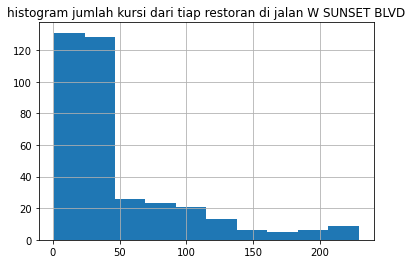

In [32]:
rest_pr['number'].hist()
plt.title('histogram jumlah kursi dari tiap restoran di jalan W SUNSET BLVD')

In [33]:
# jumlah usaha berdasarkan jenis usaha di jalan 'W SUNSET BLVD'
rest_pr_grouped = rest_pr.groupby('object_type')['id'].count()
rest_pr_grouped

object_type
Bakery         12
Bar            13
Cafe           24
Fast Food      31
Pizza          17
Restaurant    271
Name: id, dtype: int64

**Distribusi jumlah kursi di jalan W SUNSET BLVD yang paling besar distribusinya yaitu disekitar 0-48 kursi, yang lainnya diatas 50 kursi. Artinya banyak jenis usaha yang berbasis waralaba dibandingkan nonwaralaba. karena dilihat dari ciri-ciri waralaba yaitu jumlah kursi yang tidak begitu banyak.**

## Kesimpulan

**Dari hasil analisis data, usaha berbasis waralaba yaitu jenis usaha seperti bakery, cafe, pizza dan fastfood sedangkan usaha yang berbasis non waralaba yaitu seperti restoran dan bar, karena dapat dilihat dari jumlah kursi pada setiap jenis usaha, jumlah kursi pada usaha waralaba lebih sedikit dibandingkan dengan jumlah kursi pada usaha nonwaralaba. Jenis usaha yang memungkinkan untuk menggunakan pekerja robot sebagai pramusaji yaitu jenis usaha dengan jumlah kursi yang sedikit dibandingkan jenis usaha yang jumlah kursinya banyak, dimana jumlah kursi yang sedikit adalah ciri khas jenis usaha waralaba karena jika jumlah kursinya banyak maka memerlukan pekerja robot lebih banyak dan itu memerlukan biaya yang lebih besar lagi.**

presentasi <https://docs.google.com/presentation/d/1cIoFVnhkYwh8GLNg5in3lhjLnj4MQDkQtGJW-MEAjiE/edit?usp=sharing>